In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000128CEEC3908>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000128CF6E0448>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000128CF6E0688>)

In [5]:
x=tf.placeholder(tf.float32, [None,784])
y=tf.placeholder(tf.float32, [None,10])
w=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.random_normal([10]))

In [6]:
hf=tf.nn.softmax(tf.matmul(x,w)+b)
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [7]:
isCorrect=tf.equal(tf.argmax(hf,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(isCorrect,tf.float32))

In [8]:
numEpochs=15
batchsize=100
numIter=int(mnist.train.num_examples/batchsize) #60000/100=600

에폭:0001, cost:2.826302752
에폭:0002, cost:1.061668976
에폭:0003, cost:0.838061328
에폭:0004, cost:0.733232746
에폭:0005, cost:0.669279894
에폭:0006, cost:0.624611839
에폭:0007, cost:0.591160358
에폭:0008, cost:0.563868996
에폭:0009, cost:0.541745189
에폭:0010, cost:0.522673595
에폭:0011, cost:0.506782334
에폭:0012, cost:0.492447652
에폭:0013, cost:0.479955845
에폭:0014, cost:0.468893677
에폭:0015, cost:0.458703488
정확도: 0.8951
레이블: [7]
예측: [7]


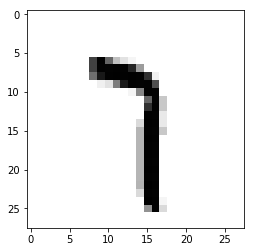

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #트레이닝
    for epoch in range(numEpochs):#15에폭
        avgCv=0
        for i in range(numIter): #600
            batchX,batchY=mnist.train.next_batch(batchsize)
            _,cv=sess.run([train,cost], feed_dict={x:batchX,y:batchY})
            avgCv+=cv/numIter
        print("에폭:{:04d}, cost:{:.9f}".format(epoch+1,avgCv))
    print("정확도:", accuracy.eval(session=sess, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    r=random.randint(0,mnist.test.num_examples-1)
    print("레이블:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("예측:", sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
              cmap='Greys')
    plt.show()

In [10]:
#학습 모델 저장/불러오기 (keras)

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation
import numpy as np

Using TensorFlow backend.


In [11]:
(xTrain, yTrain), (xTest,yTest)=mnist.load_data()

In [12]:
#전처리
xTrain=xTrain.reshape(60000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [13]:
yTrain=np_utils.to_categorical(yTrain)
yTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
yTest=np_utils.to_categorical(yTest)
yTest

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
xVal=xTrain[42000:]
xTrain=xTrain[:42000]
yVal=yTrain[42000:]
yTrain=yTrain[:42000]

In [16]:
#모델 구성
model=Sequential()
model.add(Dense(units=64, input_dim=28*28, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
#학습 환경 설정(compile)
model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
#학습(fit)
model.fit(xTrain,yTrain,epochs=5, batch_size=50,validation_data=(xVal,yVal))




Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 29us/step - loss: 1.0003 - accuracy: 0.7444 - val_loss: 0.5205 - val_accuracy: 0.8702
Epoch 2/5
42000/42000 [==============================] - 1s 26us/step - loss: 0.4540 - accuracy: 0.8806 - val_loss: 0.3925 - val_accuracy: 0.8926
Epoch 3/5
42000/42000 [==============================] - 1s 26us/step - loss: 0.3753 - accuracy: 0.8965 - val_loss: 0.3477 - val_accuracy: 0.9027
Epoch 4/5
42000/42000 [==============================] - 1s 27us/step - loss: 0.3393 - accuracy: 0.9045 - val_loss: 0.3233 - val_accuracy: 0.9099
Epoch 5/5
42000/42000 [==============================] - 1s 27us/step - loss: 0.3167 - accuracy: 0.9106 - val_loss: 0.3074 - val_accuracy: 0.9123


In [18]:
#모델 평가하기(test data)
metrics=model.evaluate(xTest,yTest,batch_size=50)
print("평가결과:"+str(metrics))

10000/10000 [==============================] - 0s 12us/step
평가결과:[0.2958790455106646, 0.9162999987602234]


In [19]:
idx=np.random.choice(xTest.shape[0],5)
xHat=xTest[idx]
yHat=model.predict_classes(xHat)

In [20]:
#print("예측값:",yHat) #예측값

for i in range(5):
    print("예측값 : "+ str(yHat[i]) + " 실제값 : "+str(np.argmax(yTest[idx[i]])))

예측값 : 9 실제값 : 9
예측값 : 0 실제값 : 0
예측값 : 5 실제값 : 5
예측값 : 3 실제값 : 3
예측값 : 4 실제값 : 4


In [21]:
model.save('mnist_model.h5') #케라스 모델 저장함수(아키테쳐+가중치) = .h5로 저장

In [22]:
model.summary() #

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [26]:
#모델 아키텍쳐 확인
# import keras
# import pydot as pyd
# from keras.utils.vis_utils import model_to_dot
# from IPython.display import SVG

# keras.utils.vis_utils.pydot = pyd

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [29]:
#실제 데이터 사용

(xTrain, yTrain), (xTest,yTest)=mnist.load_data()
xTest = xTest.reshape(10000,784).astype('float32')
yTest = np_utils.to_categorical(yTest)
idx = np.random.choice(xTest.shape[0],10)
xhat = xTest[idx]

#모델 불러오기
from keras.models import load_model
model = load_model('mnist_model.h5')
yhat=model.predict_classes(xhat)

for i in range(10):
    print("예측값 : "+ str(yhat[i]) + " 실제값 : "+str(np.argmax(yTest[idx[i]])))

예측값 : 0 실제값 : 0
예측값 : 7 실제값 : 7
예측값 : 9 실제값 : 9
예측값 : 4 실제값 : 5
예측값 : 4 실제값 : 4
예측값 : 7 실제값 : 7
예측값 : 0 실제값 : 0
예측값 : 9 실제값 : 9
예측값 : 9 실제값 : 9
예측값 : 2 실제값 : 2


In [30]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [31]:
xdata = xy[:,0:-1]
ydata = xy[:,[-1]] 

In [34]:
xdata.shape

(8, 4)

In [35]:
ydata.shape

(8, 1)

In [36]:
x = tf.placeholder(tf.float32,shape=[None,4])
y = tf.placeholder(tf.float32,shape=[None,1])

w=tf.Variable(tf.random_normal([4,1]))
b=tf.Variable(tf.random_normal([1]))

hf=tf.matmul(x,w)+b
cost=tf.reduce_mean(tf.square(hf-y)) #regression문제

In [37]:
train=tf.train.GradientDescentOptimizer(1e-5).minimize(cost)
sess= tf.Session()
sess.run(tf.global_variables_initializer())

In [38]:
for step in range(101):
    cv,hv,_= sess.run([cost, hf, train], feed_dict={x:xdata, y:ydata})
    print(step, "Cost:",cv, "Prediction:",hv)

0 Cost: 68239850000.0 Prediction: [[-183954.67]
 [-369512.62]
 [-290846.9 ]
 [-204112.56]
 [-240421.47]
 [-242438.39]
 [-222261.36]
 [-282769.78]]
1 Cost: 7.4973665e+25 Prediction: [[6.1078126e+12]
 [1.2295653e+13]
 [9.6725463e+12]
 [6.7804033e+12]
 [7.9910682e+12]
 [8.0583270e+12]
 [7.3857358e+12]
 [9.4035090e+12]]
2 Cost: inf Prediction: [[-2.0245169e+20]
 [-4.0755599e+20]
 [-3.2060957e+20]
 [-2.2474561e+20]
 [-2.6487473e+20]
 [-2.6710411e+20]
 [-2.4481017e+20]
 [-3.1169198e+20]]
3 Cost: inf Prediction: [[6.7105335e+27]
 [1.3508992e+28]
 [1.0627036e+28]
 [7.4494959e+27]
 [8.7796296e+27]
 [8.8535257e+27]
 [8.1145627e+27]
 [1.0331451e+28]]
4 Cost: inf Prediction: [[-2.2242970e+35]
 [-4.4777377e+35]
 [-3.5224746e+35]
 [-2.4692362e+35]
 [-2.9101269e+35]
 [-2.9346206e+35]
 [-2.6896814e+35]
 [-3.4244991e+35]]
5 Cost: inf Prediction: [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
6 Cost: nan Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
7 Cost: nan Predictio

99 Cost: nan Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
100 Cost: nan Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [47]:
#트레이닝 횟수 : 10000번,Ir=0.1
#예측값 출력
#0 0 => 0
#0 1 => 1
y_data = np.array([[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]])

xdata=y_data[:,0:-1]
ydata=y_data[:,[-1]]

In [48]:
y_data.shape

(8, 3)

In [51]:
print(xdata.shape)
print(ydata.shape)

(8, 2)
(8, 1)


In [52]:
x=tf.placeholder(tf.float32, shape=[None,2])
y=tf.placeholder(tf.float32, shape=[None,1])
hf=tf.sigmoid(tf.matmul(x,w)+b)



In [53]:
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))

cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [58]:
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted=tf.cast(hf>0.7, dtype=tf.float32)

accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [59]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv,_ = sess.run([cost,train], feed_dict={x:xdata,y:ydata})
        if step % 100 ==0:
            print(step,"cost:",cv)
    hv,pv,av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print("hypothesis:", hv,"prediction:", pv, "accuracy:", av)

0 cost: 1.0591345
100 cost: 0.62173724
200 cost: 0.45034343
300 cost: 0.34112996
400 cost: 0.26903075
500 cost: 0.2193935
600 cost: 0.1838086
700 cost: 0.1573691
800 cost: 0.1371147
900 cost: 0.12119104
1000 cost: 0.10839459
1100 cost: 0.097917
1200 cost: 0.08919954
1300 cost: 0.08184549
1400 cost: 0.07556654
1500 cost: 0.07014877
1600 cost: 0.06543048
1700 cost: 0.061287127
1800 cost: 0.05762189
1900 cost: 0.054358076
2000 cost: 0.051434435
2100 cost: 0.04880125
2200 cost: 0.046418082
2300 cost: 0.044251405
2400 cost: 0.042273503
2500 cost: 0.04046113
2600 cost: 0.038794518
2700 cost: 0.0372571
2800 cost: 0.035834543
2900 cost: 0.034514673
3000 cost: 0.03328681
3100 cost: 0.032141827
3200 cost: 0.031071631
3300 cost: 0.030069321
3400 cost: 0.029128611
3500 cost: 0.02824409
3600 cost: 0.027410865
3700 cost: 0.026624728
3800 cost: 0.025881788
3900 cost: 0.025178602
4000 cost: 0.024512075
4100 cost: 0.023879517
4200 cost: 0.023278402
4300 cost: 0.022706354
4400 cost: 0.022161407
4500 cos